# 🚚 **Entregables**

**No olvide duplicar esta notebook para poder editar: File->Save a copy in Drive**

En este laboratorio, no es necesario redactar un informe en un documento separado. Por favor, complete todas las actividades requeridas dentro de esta notebook de Google Colab. Recuerde que una notebook le permite ingresar elementos de texto de manera similar a un procesador de documentos. Una vez finalizadas las actividades propuestas, deberá entregar lo siguiente en la plataforma:

1. Un archivo PDF generado en Google Colab desde el menú "Archivo" -> "Imprimir".

2. El enlace público de Google Colab. Para ello, vaya al botón de compartir y cambie la configuración de compartición a "Cualquier persona con el enlace".

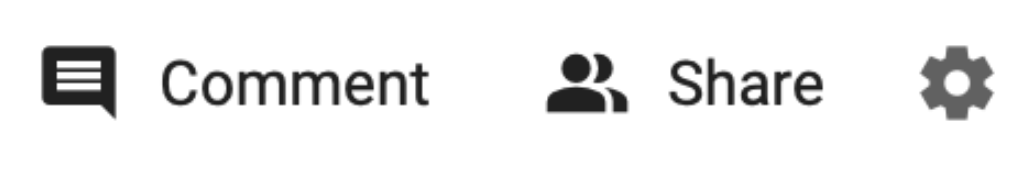

# Dataset

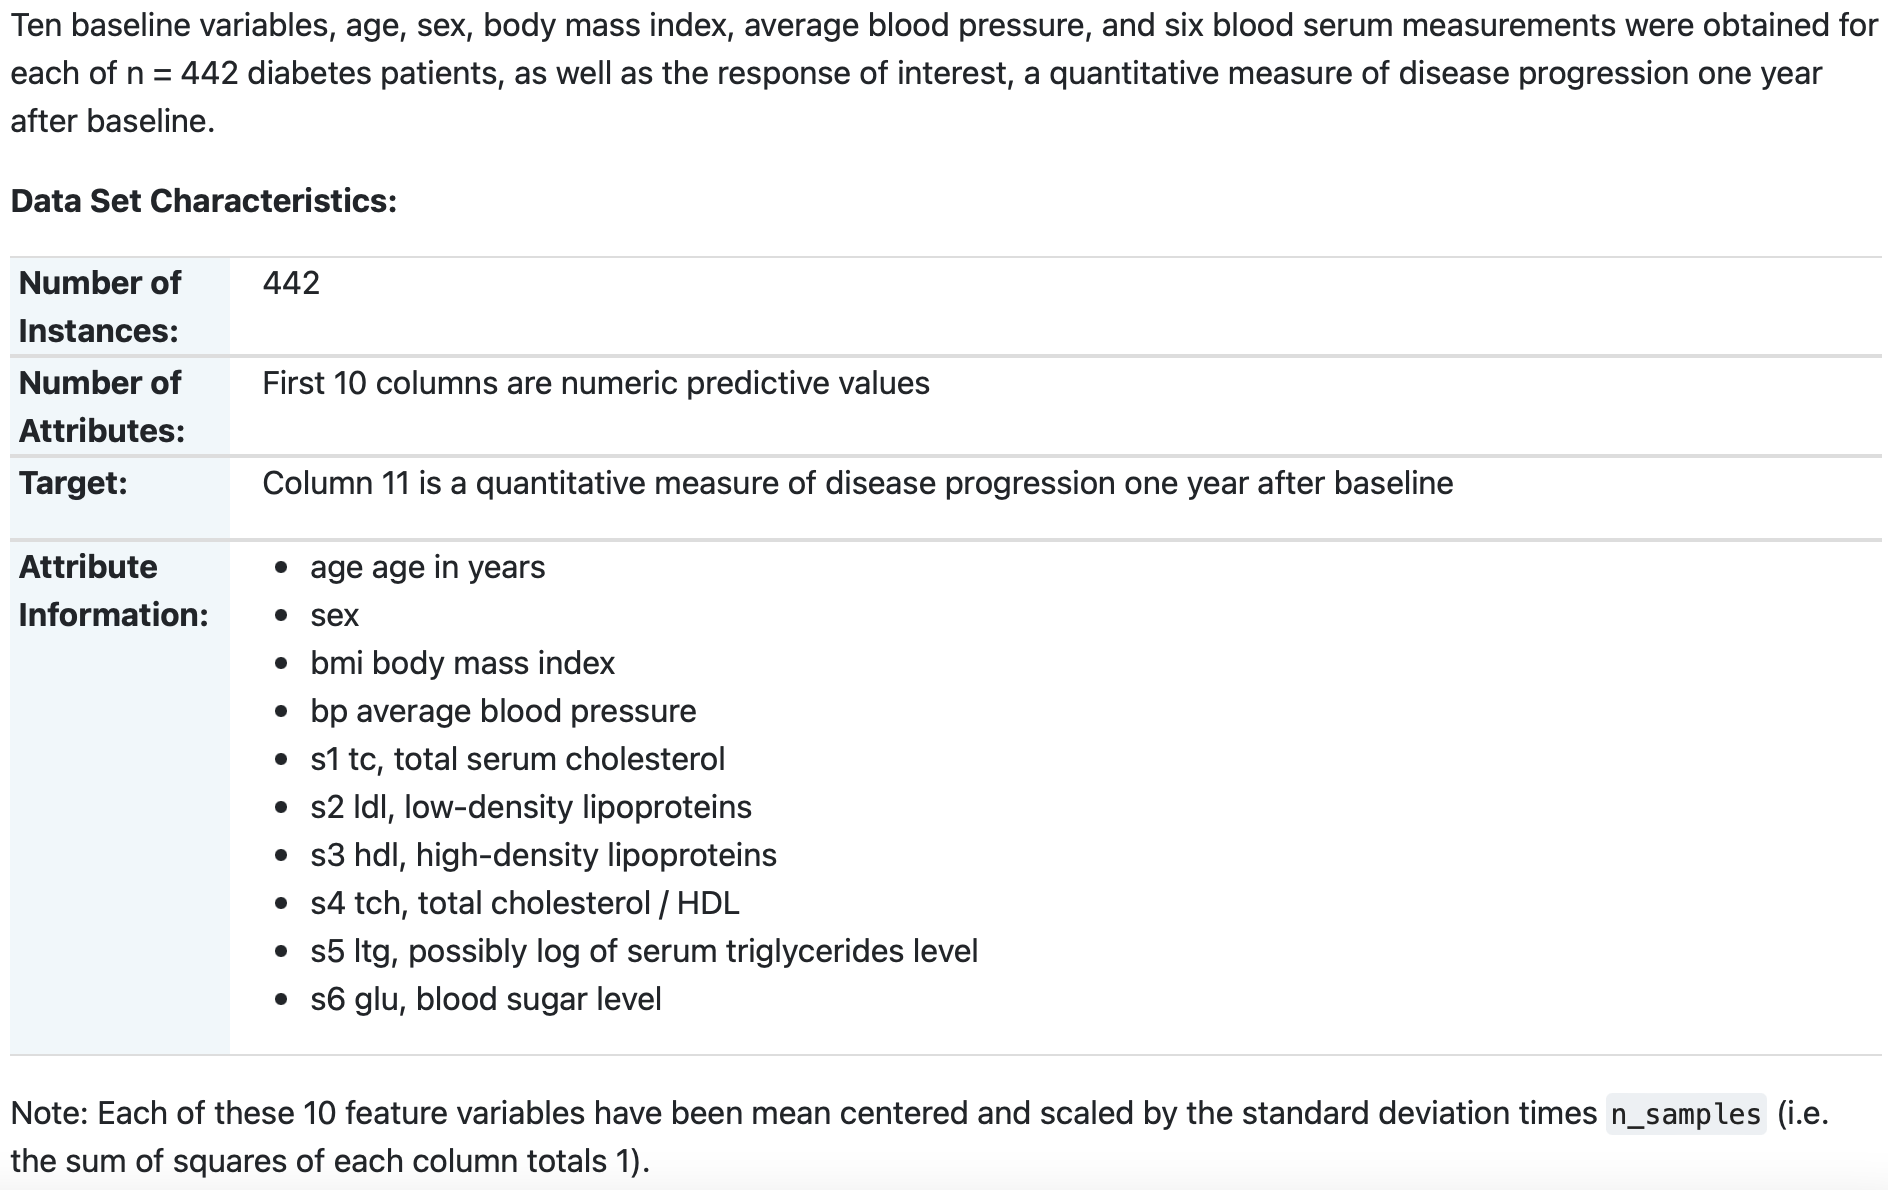

In [ ]:
import matplotlib.pyplot as plt #plots
import numpy as np #matlab de python
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score #MSE función de costo
import matplotlib.pyplot as plt #plots
import numpy as np #matlab de python
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score #MSE función de costo

# Load the diabetes dataset
diabetes_X_all, diabetes_y = datasets.load_diabetes(return_X_y=True)

#Visualizing the dataset
#import numpy as np
from tabulate import tabulate
headers = ['age','sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'output']
complete_table = np.column_stack([diabetes_X_all, diabetes_y])
table = tabulate(complete_table[0:9,:], headers, tablefmt="fancy_grid")
print ("Visualizing first 10 rows")
print(table)

import pandas as pd
df = pd.DataFrame(complete_table) #just for visualization
df.columns = headers
df
#import numpy as np
from tabulate import tabulate
headers = ['age','sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'output']
complete_table = np.column_stack([diabetes_X_all, diabetes_y])
table = tabulate(complete_table[0:9,:], headers, tablefmt="fancy_grid")
print ("Visualizing first 10 rows")
print(table)

import pandas as pd
df = pd.DataFrame(complete_table) #just for visualization
df.columns = headers
df


Visualizing first 10 rows
╒═════════════╤════════════╤═════════════╤═════════════╤═════════════╤═════════════╤══════════════╤═════════════╤═════════════╤═════════════╤══════════╕
│         age │        sex │         bmi │          bp │          s1 │          s2 │           s3 │          s4 │          s5 │          s6 │   output │
╞═════════════╪════════════╪═════════════╪═════════════╪═════════════╪═════════════╪══════════════╪═════════════╪═════════════╪═════════════╪══════════╡
│  0.0380759  │  0.0506801 │  0.0616962  │  0.0218724  │ -0.0442235  │ -0.0348208  │ -0.0434008   │ -0.00259226 │  0.0199075  │ -0.0176461  │      151 │
├─────────────┼────────────┼─────────────┼─────────────┼─────────────┼─────────────┼──────────────┼─────────────┼─────────────┼─────────────┼──────────┤
│ -0.00188202 │ -0.0446416 │ -0.0514741  │ -0.0263275  │ -0.00844872 │ -0.0191633  │  0.0744116   │ -0.0394934  │ -0.0683315  │ -0.092204   │       75 │
├─────────────┼────────────┼─────────────┼─────────────┼

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,output
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['bp'].plot(kind='hist', bins=20, title='bp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sex', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bmi', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bp', y='s1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['bp'].plot(kind='line', figsize=(8, 4), title='bp')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='bmi', ylabel='output'>

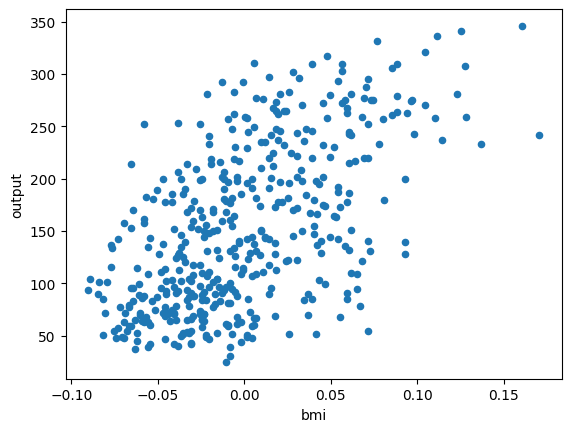

In [ ]:
# prompt: Using dataframe df: bmi vs output

df.plot.scatter(x='bmi', y='output')


Coefficients: 
 theta_1 =  [44.64921599]  theta_0  =  153.36255924170615
Mean squared error (MSE Cost): 2548.07
Coefficient of determination: 0.47


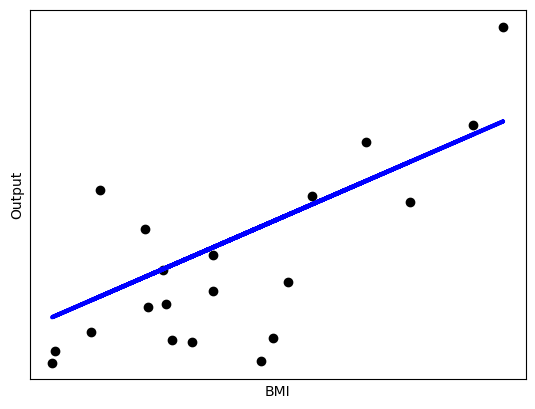

In [ ]:
# Use only one feature, feature 2. bmi
diabetes_X = np.reshape(diabetes_X_all[:, 2], (-1, 1)) #column vector

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:] #last 20 for test

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# normalize data to have zero mean and std one (feature scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #zscore
scaler.fit(diabetes_X_train)# scaler fit is just for training dataset
diabetes_X_train_normalized = scaler.transform(diabetes_X_train) #normalize training set

# Train the model using the training sets
regr.fit(diabetes_X_train_normalized, diabetes_y_train) # 1. REPRESENTAR hypothesis, 2. EVALUAR MSE Error Cuadr[atico Medio 3. OPTIMIZAR (Gradient Descent)

# Make predictions using the testing set
#scaler.fit(diabetes_X_test) #EQUIVOCADO, NOOOOOOOOOOOOO!!! FEO FEO
diabetes_X_test_normalized = scaler.transform(diabetes_X_test) #normalize test set (do not fit scaler again!)
diabetes_y_pred = regr.predict(diabetes_X_test_normalized)

# The coefficients theta_0 (inter.), theta_1 (pendiente)
print("Coefficients: \n", "theta_1 = ", regr.coef_, " theta_0  = ", regr.intercept_)
# The mean squared error
print("Mean squared error (MSE Cost): %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction, varía entre 0 y 1
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test_normalized, diabetes_y_test, color="black")
plt.plot(diabetes_X_test_normalized, diabetes_y_pred, color="blue", linewidth=3)
plt.xlabel('BMI')
plt.ylabel('Output')
plt.xticks(())
plt.yticks(())

plt.show()

Aquí las observaciones solicitadas



#**✅ Actividad 2: Uso de SGDRegressor con Mini-batch Gradient Descent**

Repite la Actividad 1 utilizando la función `partial_fit` del modelo [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.partial_fit) de Scikit-learn. Implementa el entrenamiento mediante mini-batch Gradient Descent con el método `.partial_fit`. Recuerda que el `scaler` también necesita ser ajustado utilizando `partial_fit`.

**Objetivos:**

1. Entrenar el modelo **sin regularización** con dos valores distintos de la tasa de aprendizaje (learning rate):
   - Caso 1: Learning rate = 0.001
   - Caso 2: Learning rate = 0.1

2. Grafica la función de pérdida (Loss) en función de las iteraciones (Iterations) para ambos casos.

3. Comenta tus observaciones sobre los resultados obtenidos.

**Tip:** Puedes consultar este [enlace](https://stackoverflow.com/questions/63660682/batch-size-and-number-of-epochs-in-partial-fit-in-sklearn-sgdregressor) para más información sobre cómo ajustar el tamaño de batch y el número de épocas en `partial_fit`.


In [ ]:
#aquí tu código